# Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
#import pdb;

# Understanding the Data

## Importing the Data

In [2]:
Sales_Data = pd.read_csv('Data/Groceries_dataset.csv')
Sales_Data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
Sales_Data.shape

(38765, 3)

## Plotting the Data (Top 20 and bottom of frequently sold items)

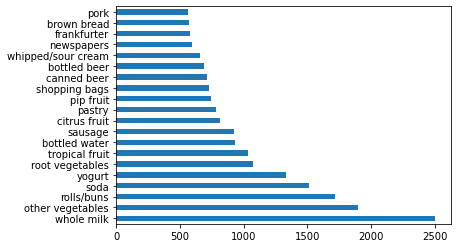

In [4]:
Sales_Data['itemDescription'].value_counts()[:20].plot(kind='barh')

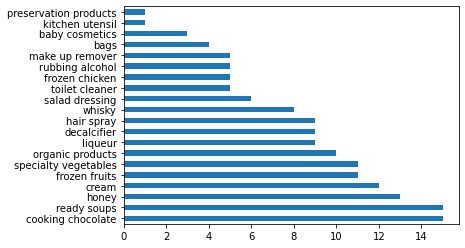

In [5]:
Sales_Data['itemDescription'].value_counts()[-20:].plot(kind='barh')

> The data contains 38 765 transactions where each row represents one quantity and one product. Whole milk is the most popular product while kitchen utensil is the less bought product. 

## Cleaning the Data

### Checking for Null, N/A and duplicates

In [6]:
print("Total N/A values: " ,Sales_Data.isna().sum().sum())

Total N/A values:  0


In [7]:
print("Total null values: ",Sales_Data.isnull().sum().sum())

Total null values:  0


In [8]:
Duplicated_rows = Sales_Data[Sales_Data.duplicated(keep=False)]
print("Number of duplicated rows: ", Duplicated_rows.shape)

Number of duplicated rows:  (1491, 3)


In [9]:
Duplicated_rows.sort_values(by=['Date', 'Member_number', 'itemDescription']).head()

,Member_number,Date,itemDescription
3677,1235,01-01-2015,sausage
8648,1235,01-01-2015,sausage
15721,2763,01-02-2015,yogurt
19957,2763,01-02-2015,yogurt
8544,2944,01-02-2015,yogurt


In [10]:
# Drop duplicated values
Sales_Data = Sales_Data.drop_duplicates()
Sales_Data.shape

(38006, 3)

> The data appears to be cleaned before this analysis. No Null or N/A values. Duplicated values are allowed in the nature of the data (one customer can shop more than one sausage on one day for example). But since we are only interested in the correlation between products (and not quantity) we will drop the duplicated values.

# Future building and One-Hot encoding 

## Creating a invoice-number 

In [11]:
Sales_Data['Invoice_Nr'] = Sales_Data.apply (lambda row: str(row.Member_number) + row.Date , axis=1)
Sales_Data = Sales_Data[['Invoice_Nr', 'Member_number', 'Date', 'itemDescription']]
Sales_Data = Sales_Data.drop(['Member_number','Date'], axis=1)
Sales_Data.sort_values(by='Invoice_Nr')

,Invoice_Nr,itemDescription
20992,100015-03-2015,semi-finished bread
8395,100015-03-2015,whole milk
24544,100015-03-2015,yogurt
4843,100015-03-2015,sausage
29480,100024-06-2014,pastry
...,...,...
3578,500010-02-2015,soda
34885,500010-02-2015,semi-finished bread
19727,500010-02-2015,root vegetables
9340,500016-11-2014,bottled beer


> An invoice-number/receipt-number is created by combing the date and the member number. Hence if a customer shops more then one time on
one day it will only get one invoice number. 

## Plottning number of items per invocenumber

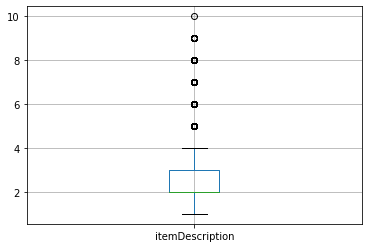

In [12]:
Sales_Data.groupby(['Invoice_Nr']).count().boxplot()


>The dataset consists of unique items per invoice number between 1 and 4 with some outliers as high as 10 unique items per invoice number. 50% of the records are between 2 and 3 unique items per invoice number. 

## One-Hot Encoding 

In [13]:
Sales_Data_Enc =Sales_Data[['Invoice_Nr']].join(pd.get_dummies(Sales_Data['itemDescription'])).groupby('Invoice_Nr').max().fillna(0)
Sales_Data_Enc.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Invoice_Nr,,,,,,,,,,,,,,,,,,,,,
100015-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
100024-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100024-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100025-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100027-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
Sales_Data_Enc.shape

(14963, 167)

> The dataframe is now transformed to represent the 167 uniuq products and the 14 963 invoices.

## Removing transactions that only have one item sold per invoice
> The records that only have one item sold would not say anything about the relation between two products.

In [15]:
Sales_Data_Enc = Sales_Data_Enc[(Sales_Data_Enc >0).sum(axis =1) >= 2]
Sales_Data_Enc.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Invoice_Nr,,,,,,,,,,,,,,,,,,,,,
100015-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
100024-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100024-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100025-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100027-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Analysis - Apriori Algorithm

There are some measurements that need to be explained to understand the result of the Apriori Algorithm, "Support"
"Confidence","Lift", "Levarage" and "Conviction". 

### Support
Support describes how frequently a product or a set of products are bought. It is calculated by the equation below: 

\begin{equation*}
 Support(A) =
\frac{Total\:number\:of\:invoices\:that\:contain\:item\:A}{Total\:number\:of\:invoices} 
\end{equation*}

Let say that A=pork has a support value of 0,03 which means that pork is bought on 3% of all the invoices. 
From the result there are three types of support: 

- Antecedent Support: Support for product A
- Consequent Support: Support for product B
- Support: Support for product  $A \cup B$

### Confidence
Confidence describes the likelihood to buy product B if you bought product A.
For example, let say that the confidence(Pork->Beef) = 0,02. That means that there is a 2% likelihood that if the customer bought pork they will also buy beef. Note that this only works one way and that the confidence(Beef->Pork) is something else.

\begin{equation*}
 Support(x) =
\frac{Total\:number\:of\:invoices\:that\:contain\:item\:A\:and\:B}{Total\:number\:of\:invoices\:containing\:A} 
\end{equation*}

### Lift
Lift describes the ratio of how much more the customer is likely to buy product B if they bought product A or not. Let say that lift(Pork->Beef) = 1,5. That means that the customer is now 1,5 times more likely to buy beef after they bought pork. Lift below 1 indicates that the products are less likely to be bought together. Lift equal to one means that there is no association between the products and lift greater than one means that they are more likely to be bought together. 

\begin{equation*}
 Lift(A->B) =
\frac{Confidence(A->B)}{Support(B)} 
\end{equation*}

### Leavrage
Leverage describes the differences between how often the combination of A and B are sold compared to how often A and B separately are sold. A value around zero indicates that the products are independent.

\begin{equation*}
 Leavrage(A->B) = Support(A->B) - Support(A)*Support(B) 
\end{equation*}

### Conviction
Conviction describes the dependency on product B of A. Let say that product B has a support value close to zero meaning that there are few or zero invoices with product B on them. Then the nominator in the equation below would be close to zero and since confidence(A->B) always is between zero and one the equation would go towards infinity. A high value indicates that B is highly dependent on A.

\begin{equation*}
 Conviction(A->B) =
\frac{1 - Support(B)}{1-Confidence(A->B)} 
\end{equation*}

> To read more about the Apriori Algorithm please use this [link](https://www.it.uu.se/edu/course/homepage/infoutv/ht08/vldb94_rj.pdf). 

## Creating a dataframe with frequent_itemsets

In [16]:
frequent_itemsets = apriori(Sales_Data_Enc, min_support=0.0001, use_colnames=True)
frequent_itemsets['lenght'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.sort_values(by='lenght',ascending = False)

,support,itemsets,lenght
8342,0.000203,"(whole milk, yogurt, pork, sausage, soda)",5
8332,0.000136,"(coffee, sausage, soda, pastry, frankfurter)",5
8322,0.000136,"(brown bread, frozen vegetables, frankfurter, ...",5
8323,0.000136,"(whole milk, brown bread, domestic eggs, citru...",5
8324,0.000136,"(whole milk, butter milk, yogurt, rolls/buns, ...",5
...,...,...,...
110,0.037471,(pork),1
109,0.003252,(popcorn),1
108,0.049668,(pip fruit),1
107,0.009080,(pickled vegetables),1


## Creating a dataframe with the association rules 

In [17]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)
rules.head(100).sort_values(by ='lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(yogurt),(whole milk),0.086055,0.157406,0.011316,0.131496,0.835393,-0.002230,0.970167
8,(whole milk),(yogurt),0.157406,0.086055,0.011316,0.071890,0.835393,-0.002230,0.984738
4,(rolls/buns),(whole milk),0.109906,0.157406,0.014162,0.128853,0.818604,-0.003138,0.967224
5,(whole milk),(rolls/buns),0.157406,0.109906,0.014162,0.089970,0.818604,-0.003138,0.978092
0,(rolls/buns),(other vegetables),0.109906,0.122510,0.010706,0.097411,0.795125,-0.002759,0.972192
1,(other vegetables),(rolls/buns),0.122510,0.109906,0.010706,0.087389,0.795125,-0.002759,0.975327
3,(other vegetables),(whole milk),0.122510,0.157406,0.015043,0.122788,0.780069,-0.004241,0.960536
2,(whole milk),(other vegetables),0.157406,0.122510,0.015043,0.095566,0.780069,-0.004241,0.970209
6,(whole milk),(soda),0.157406,0.097371,0.011790,0.074903,0.769256,-0.003537,0.975713
7,(soda),(whole milk),0.097371,0.157406,0.011790,0.121086,0.769256,-0.003537,0.958676


In [18]:
rules.shape

(10, 9)

## Extracting the most important rules 

In [19]:
rules.head(5).sort_values(by ='support',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(whole milk),(other vegetables),0.157406,0.122510,0.015043,0.095566,0.780069,-0.004241,0.970209
3,(other vegetables),(whole milk),0.122510,0.157406,0.015043,0.122788,0.780069,-0.004241,0.960536
4,(rolls/buns),(whole milk),0.109906,0.157406,0.014162,0.128853,0.818604,-0.003138,0.967224
0,(rolls/buns),(other vegetables),0.109906,0.122510,0.010706,0.097411,0.795125,-0.002759,0.972192
1,(other vegetables),(rolls/buns),0.122510,0.109906,0.010706,0.087389,0.795125,-0.002759,0.975327


> The item-sets that are most frequently bought together are "other vegetables" and "whole milk". These products are on 1,5% of all of the invoices. "Rolls/buns" and whole "milk" are on 1,4% of all the invoices. 

In [20]:
rules.head(5).sort_values(by ='confidence',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(rolls/buns),(whole milk),0.109906,0.157406,0.014162,0.128853,0.818604,-0.003138,0.967224
3,(other vegetables),(whole milk),0.122510,0.157406,0.015043,0.122788,0.780069,-0.004241,0.960536
0,(rolls/buns),(other vegetables),0.109906,0.122510,0.010706,0.097411,0.795125,-0.002759,0.972192
2,(whole milk),(other vegetables),0.157406,0.122510,0.015043,0.095566,0.780069,-0.004241,0.970209
1,(other vegetables),(rolls/buns),0.122510,0.109906,0.010706,0.087389,0.795125,-0.002759,0.975327


> "Roll/Buns" and "Whole milk" have the largest confidence with a value of 12,8% meaning that if the customer bought "rolls/buns" the likelihood of them buying "whole milk" also is 12,8%. 

In [21]:
rules.head(5).sort_values(by ='lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(rolls/buns),(whole milk),0.109906,0.157406,0.014162,0.128853,0.818604,-0.003138,0.967224
0,(rolls/buns),(other vegetables),0.109906,0.122510,0.010706,0.097411,0.795125,-0.002759,0.972192
1,(other vegetables),(rolls/buns),0.122510,0.109906,0.010706,0.087389,0.795125,-0.002759,0.975327
3,(other vegetables),(whole milk),0.122510,0.157406,0.015043,0.122788,0.780069,-0.004241,0.960536
2,(whole milk),(other vegetables),0.157406,0.122510,0.015043,0.095566,0.780069,-0.004241,0.970209


>  All the values for Lift are below one that indicates that the customers are less likely to buy another product if they already bought one product.

## Recommendation and Conclusion

The data set seems to be from a small store with few items per invoice/receipt. The best item set to work with from this data is rolls/buns and whole milk. This product should be near each other in the store or create a bundle between the two items to increase sales. I would recommend to try one of the approaches and follow up on the measurements above for the next month, especially lift to see if the customer will become more likely to buy whole milk if they already bought rolls/buns. 

If you find this notebook helpful, pleas leave a comment or star the repository.